In [1]:
##%matplotlib widget
## with %matplotlib notebook: seems to require ipympl as part of environment, either
## part of the conda environment or "pip install ipympl"
## otherwise, does not show ANY plots in notebook, plt.savefig() works
%matplotlib notebook  
##%matplotlib inline    ## --plt.savefig()  works, but re-sizing does NOT


Check the current GPU usage. Please try to be nice!

> **WARNING**: The card numbers here are *not* the same as in CUDA. You have been warned.

## Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
import torch
import pandas as pd

# Python 3 standard library
from pathlib import Path

from torchsummary import summary

### Set up local parameters

Make the output directory if it does not exist:

## Get the helper functions

Add the directory with the model
definitions to the path so we can import from it:

> When you type `import X`,
Python searches `sys.path` for a python
file named `X.py` to import. So we need to add the model directory to the path.

In [6]:
# From model/collectdata.py
from model.collectdata_poca_KDE import collect_data, read_data

# From model/loss.py
##from loss import Loss
from model.alt_loss_A import Loss

# From model/training.py
from model.training import trainNet, select_gpu

# From model/models.py
##  will start with model from TwoFeatures_CNN6Layer_A in the first instance
##  see relevant cell below


from model.models_mds_01June20 import SimpleCNN5Layer_Ca as Model

from model.training import trainNet, select_gpu, Results
from model.plots import dual_train_plots, replace_in_ax

In [7]:
X_A, X_B, kernel, xMax, yMax = read_data('dataAA/100_POCA_kernel_val_A.h5',
                             masking=True)
                           

Loading data...
Loaded dataAA/100_POCA_kernel_val_A.h5 in 0.1136 s


X_A,shape =  (100, 1, 4000)
len(X_A) =  100
scaled ratio = 0.984 


<IPython.core.display.Javascript object>


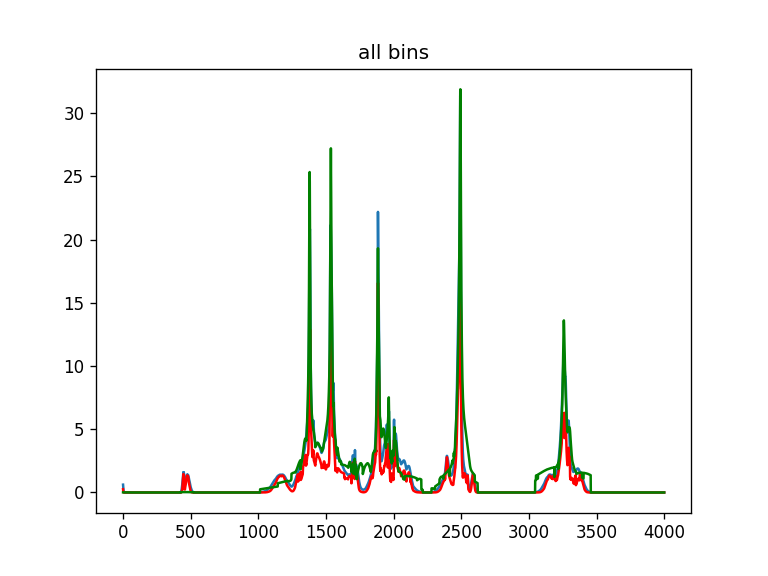

<IPython.core.display.Javascript object>


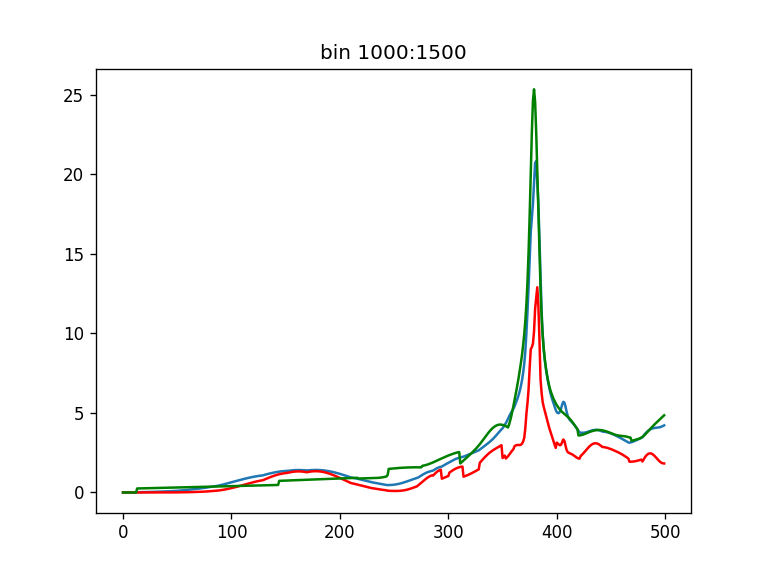

<IPython.core.display.Javascript object>


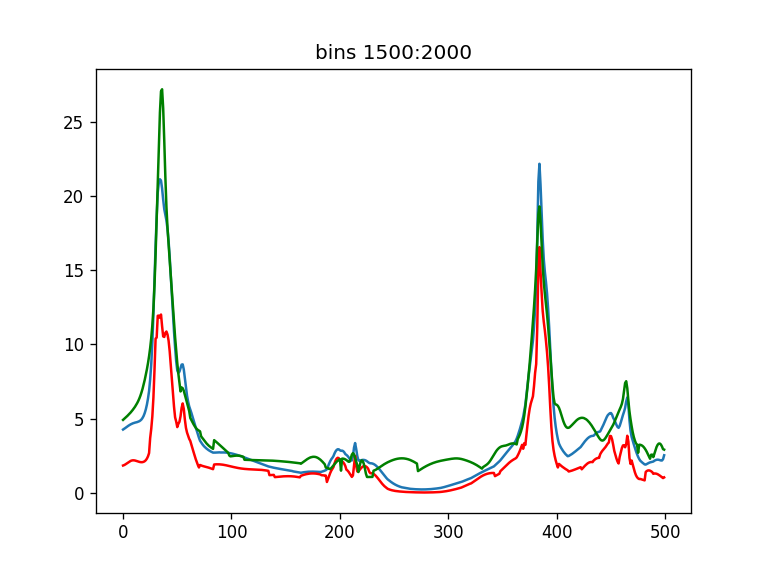

scaled ratio = 1.265 


<IPython.core.display.Javascript object>


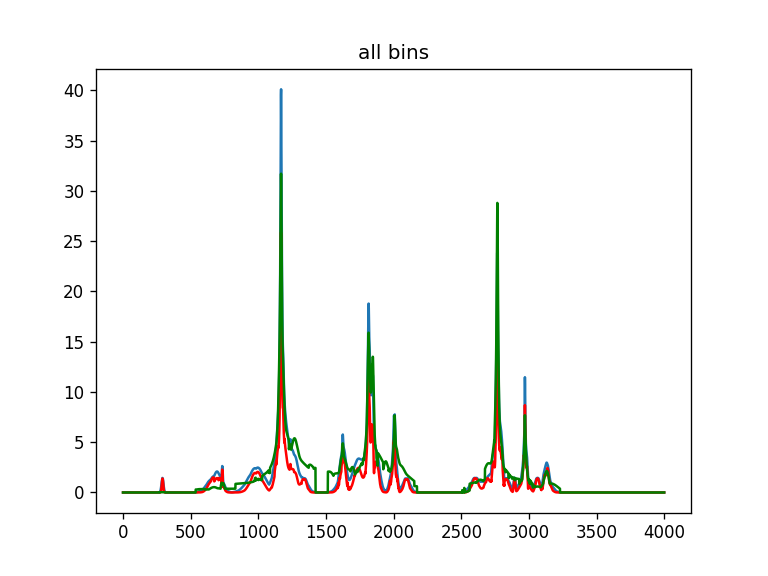

<IPython.core.display.Javascript object>


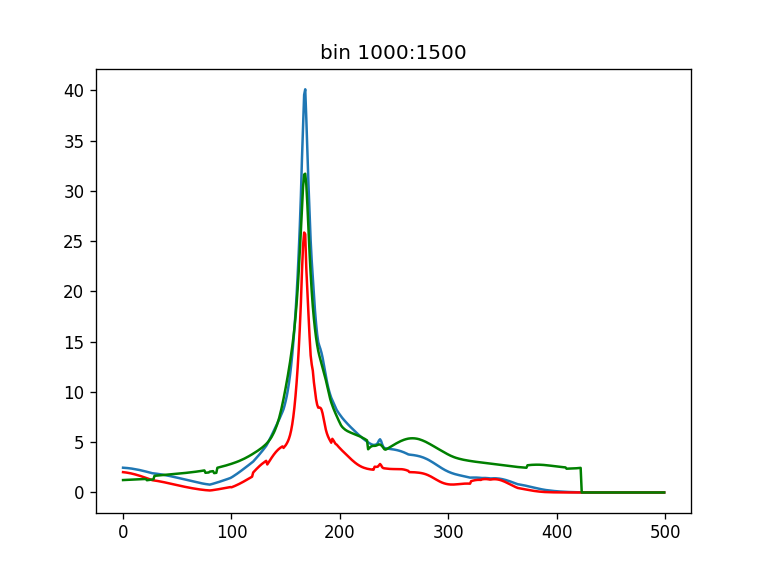

<IPython.core.display.Javascript object>


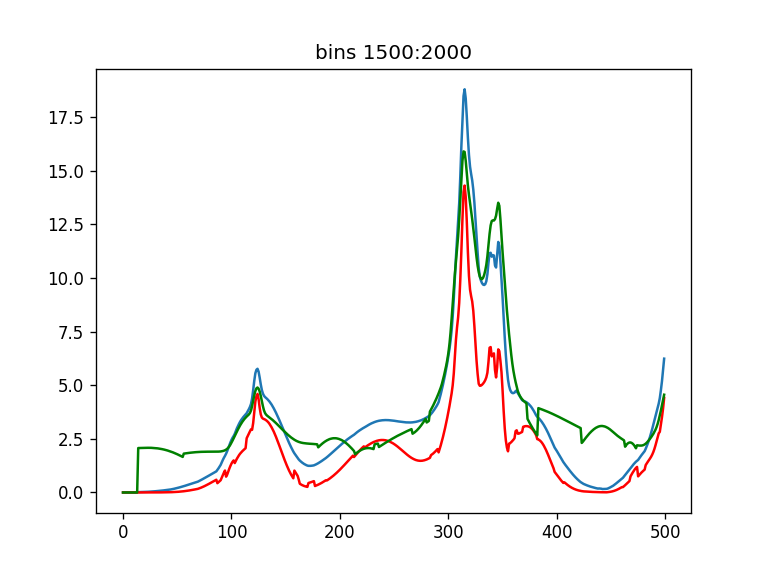

scaled ratio = 1.150 


<IPython.core.display.Javascript object>


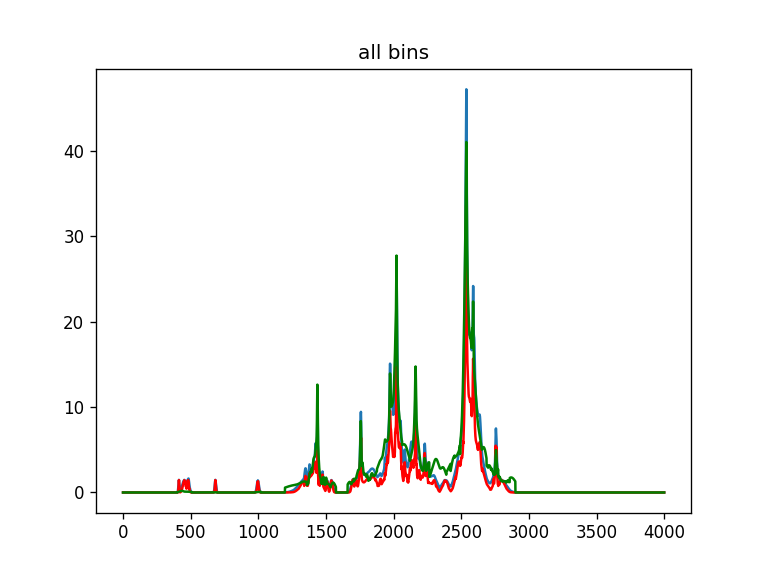

<IPython.core.display.Javascript object>


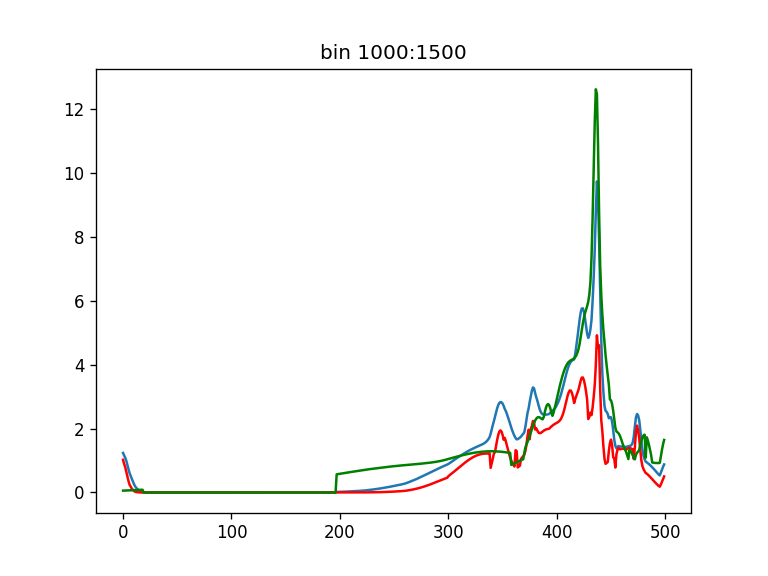

<IPython.core.display.Javascript object>


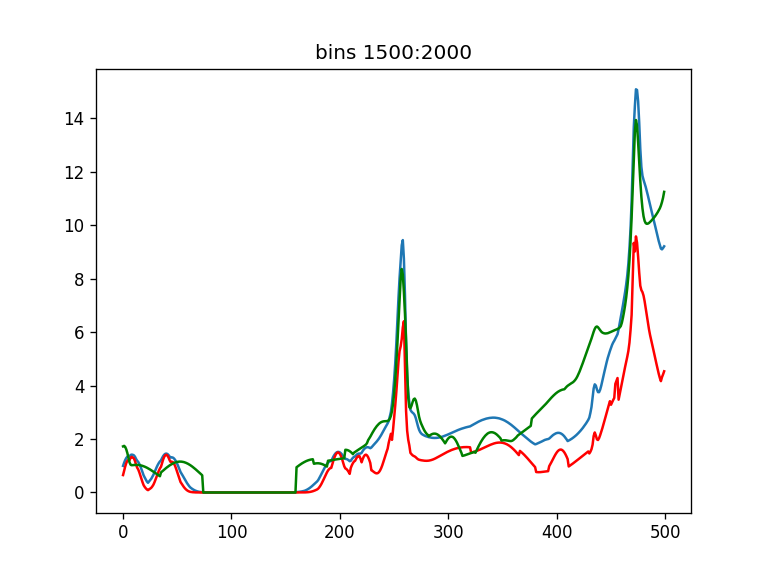

scaled ratio = 0.853 


<IPython.core.display.Javascript object>


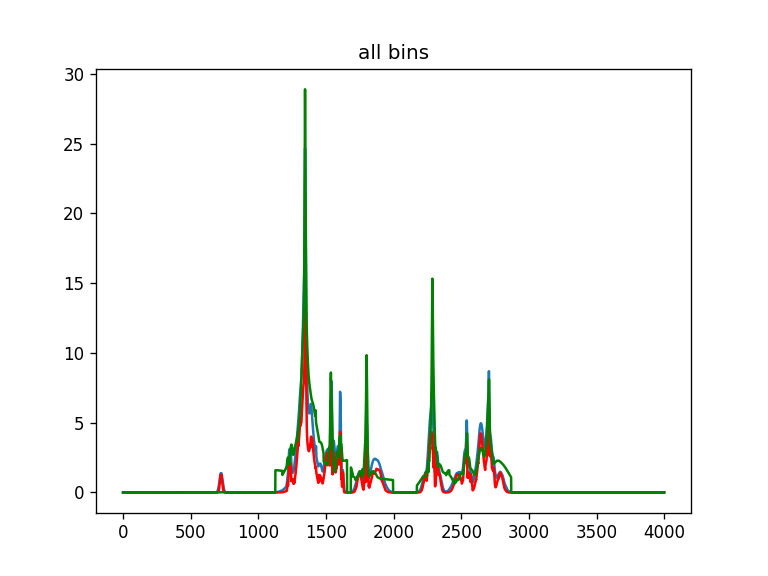

<IPython.core.display.Javascript object>


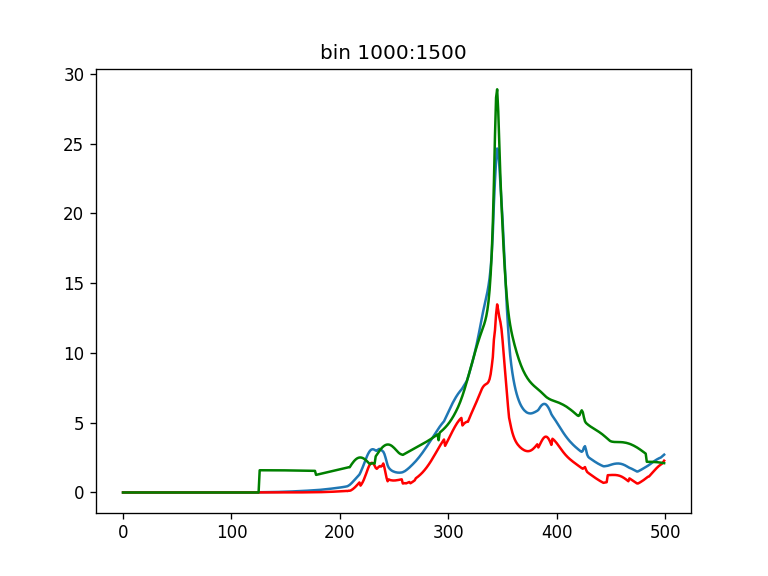

<IPython.core.display.Javascript object>


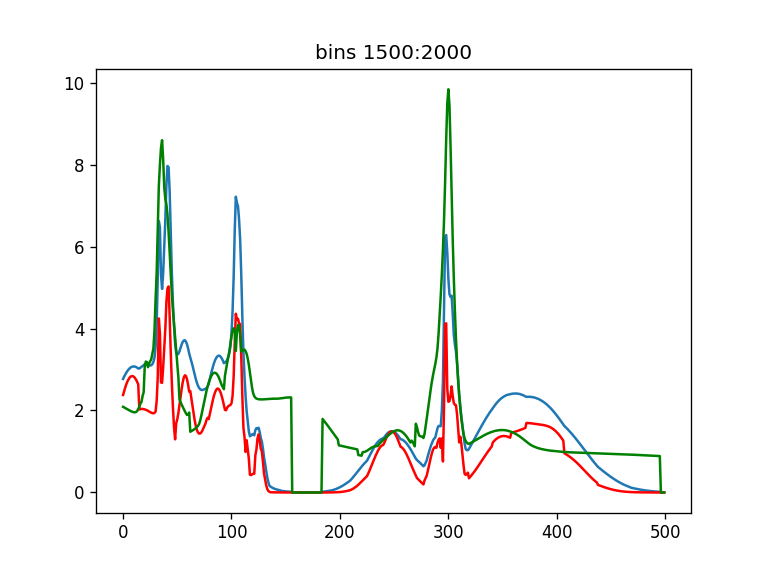

scaled ratio = 1.060 


<IPython.core.display.Javascript object>


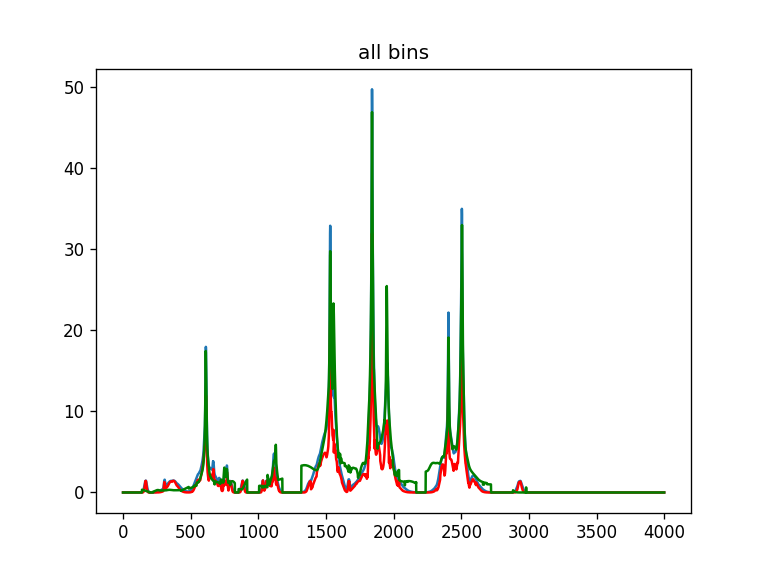

<IPython.core.display.Javascript object>


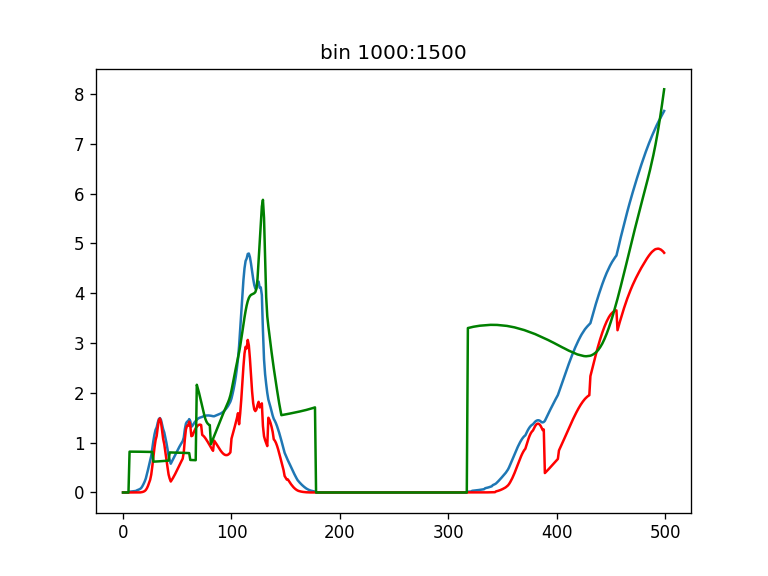

<IPython.core.display.Javascript object>


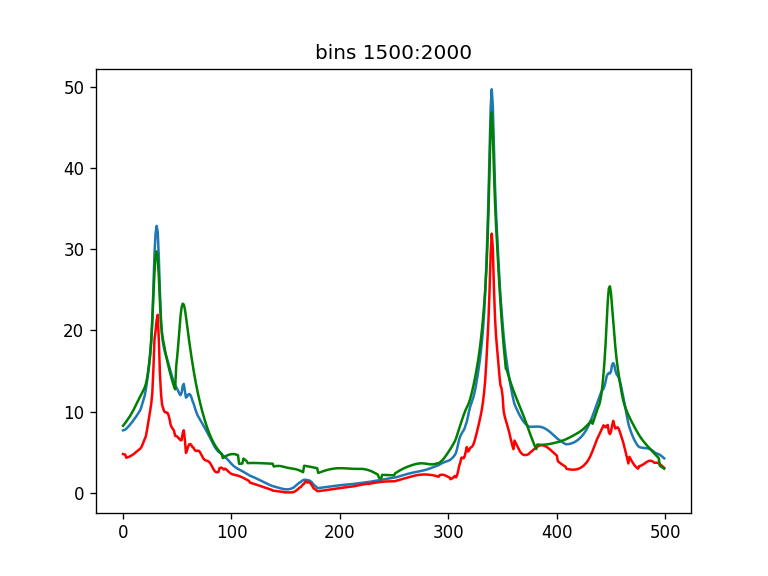

scaled ratio = 1.058 


<IPython.core.display.Javascript object>


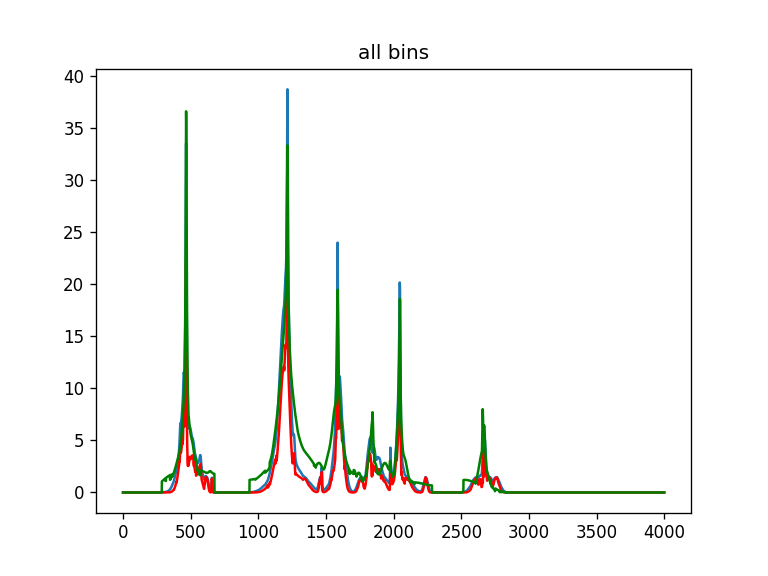

<IPython.core.display.Javascript object>


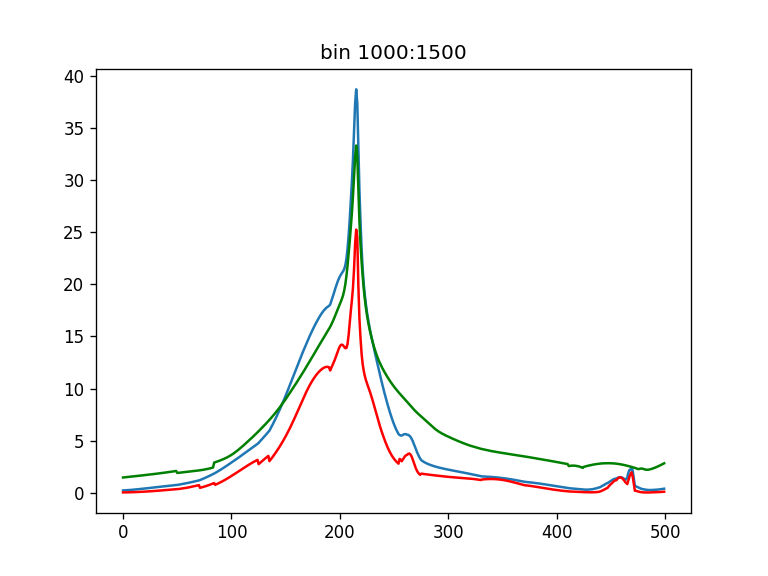

<IPython.core.display.Javascript object>


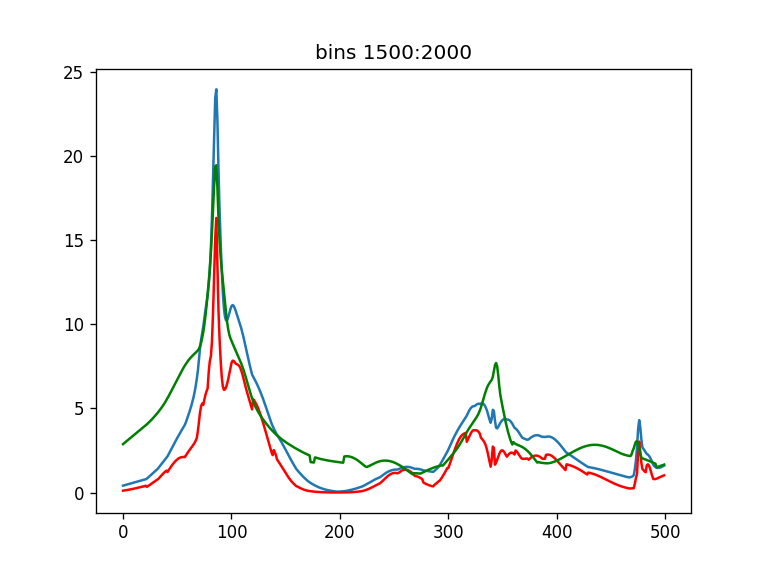

scaled ratio = 0.863 


<IPython.core.display.Javascript object>


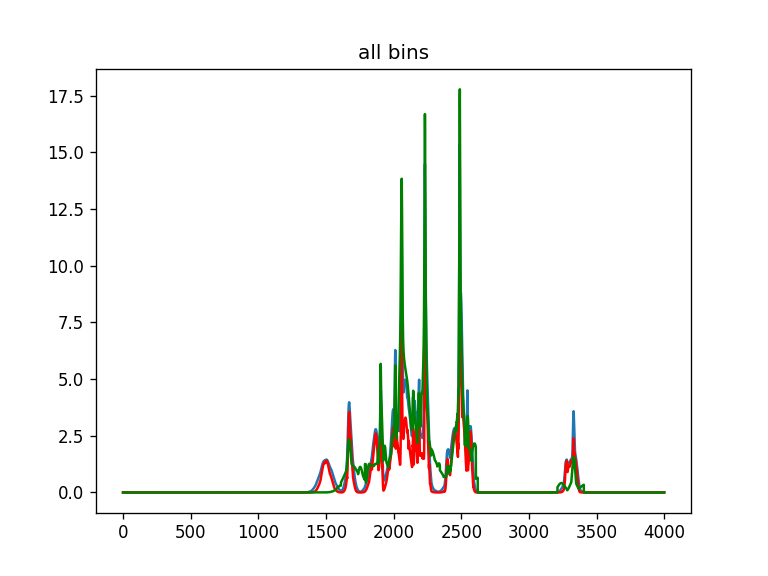

<IPython.core.display.Javascript object>


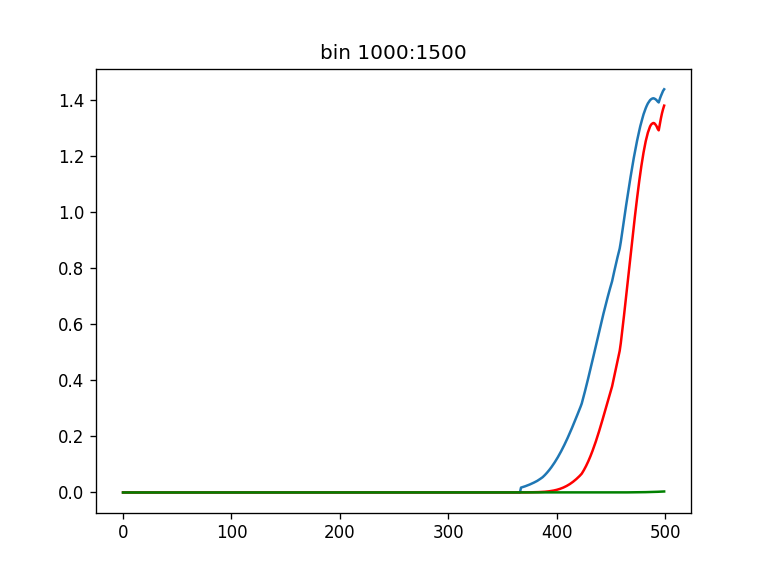

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


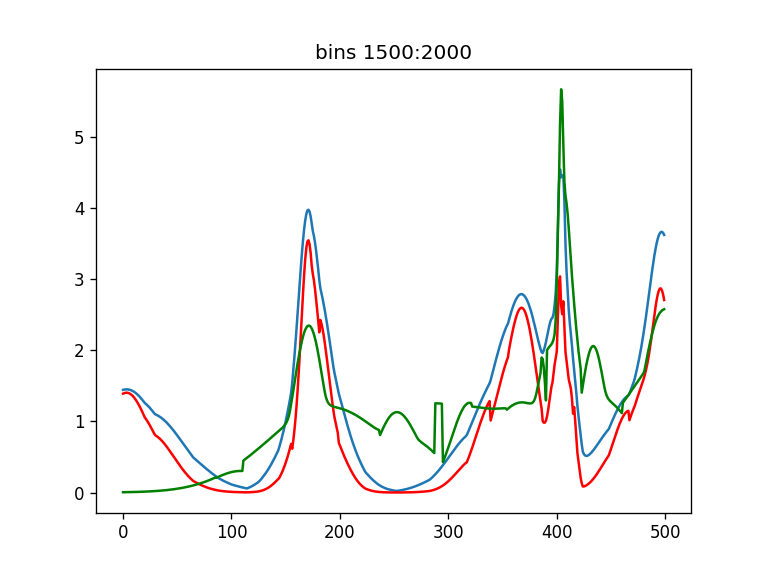

scaled ratio = 0.842 


/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


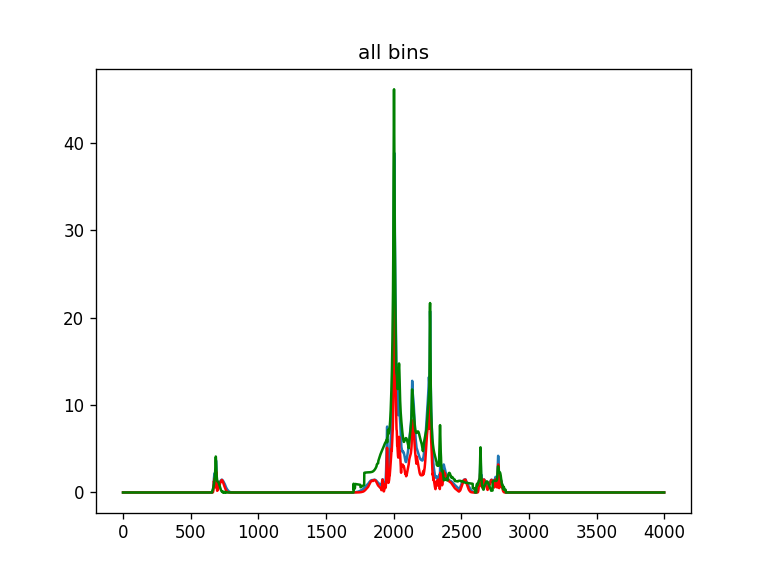

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


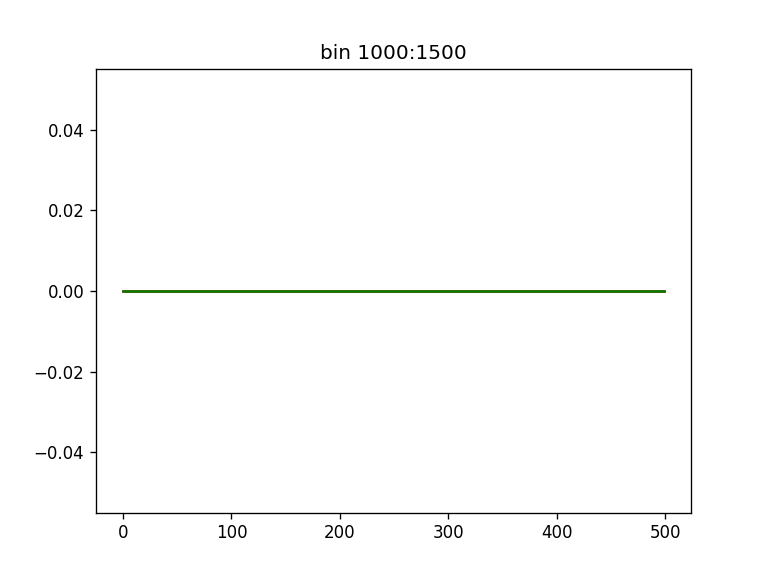

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


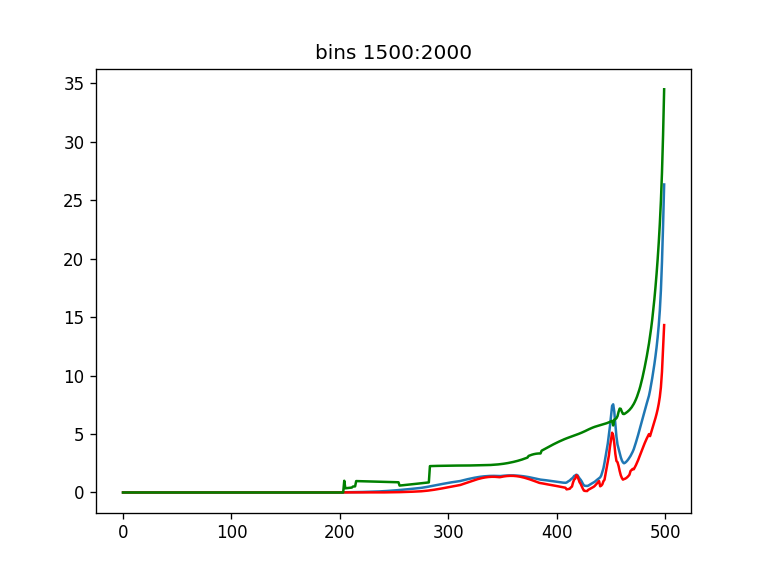

scaled ratio = 0.748 


/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


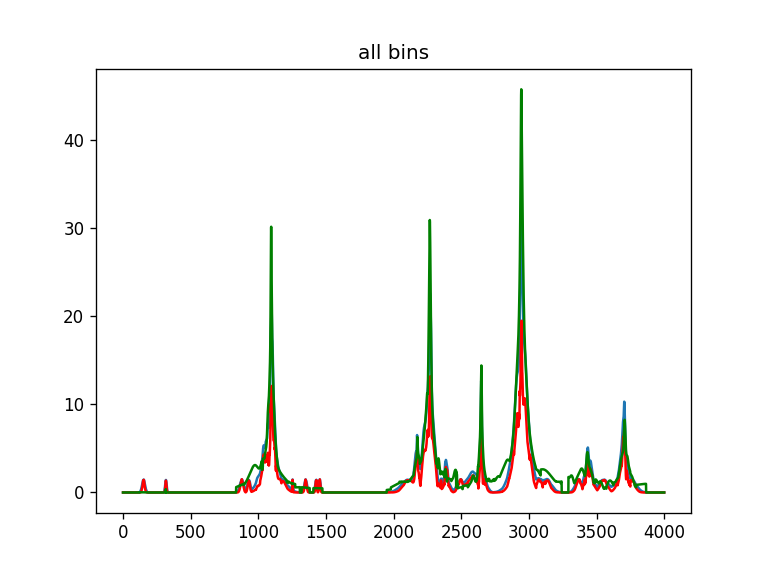

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


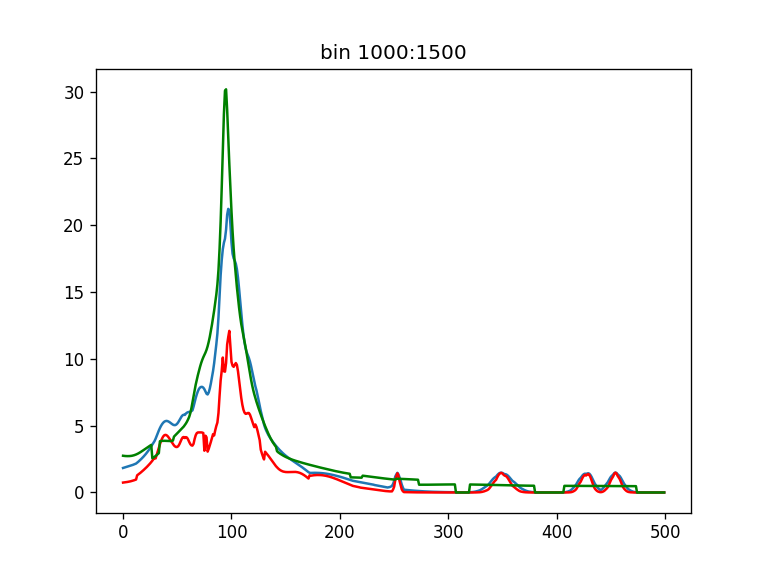

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


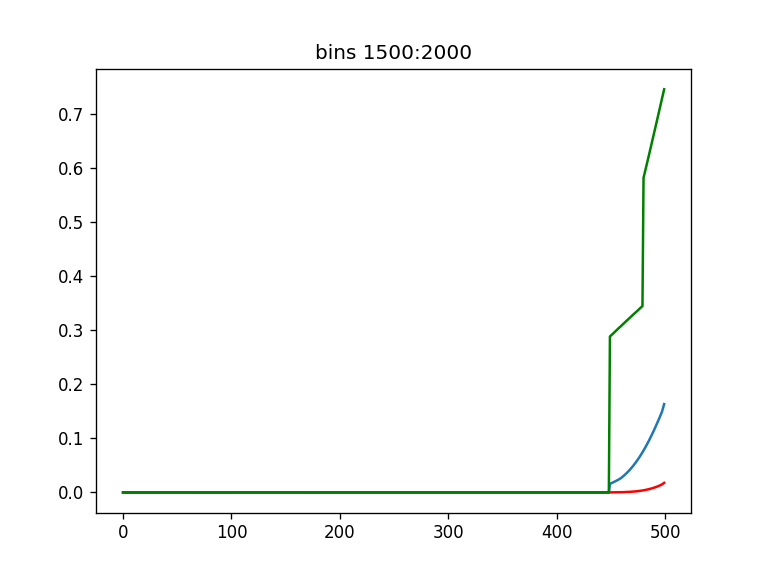

scaled ratio = 1.095 


/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


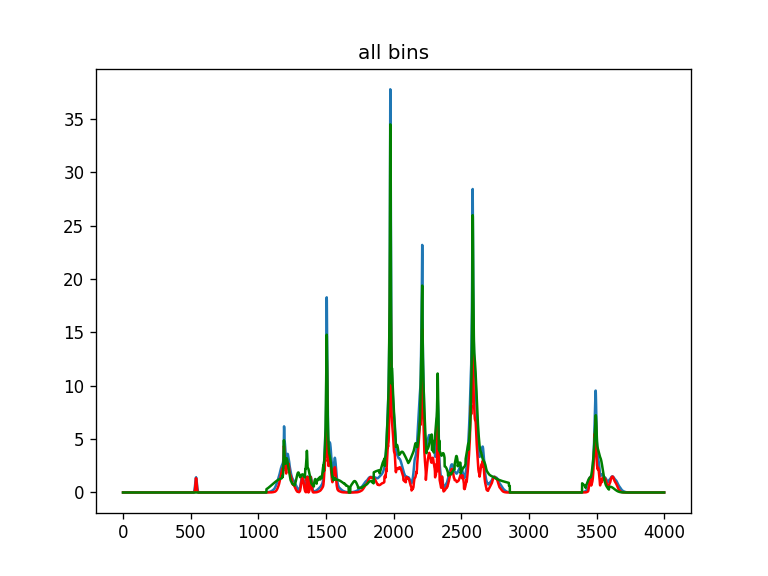

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


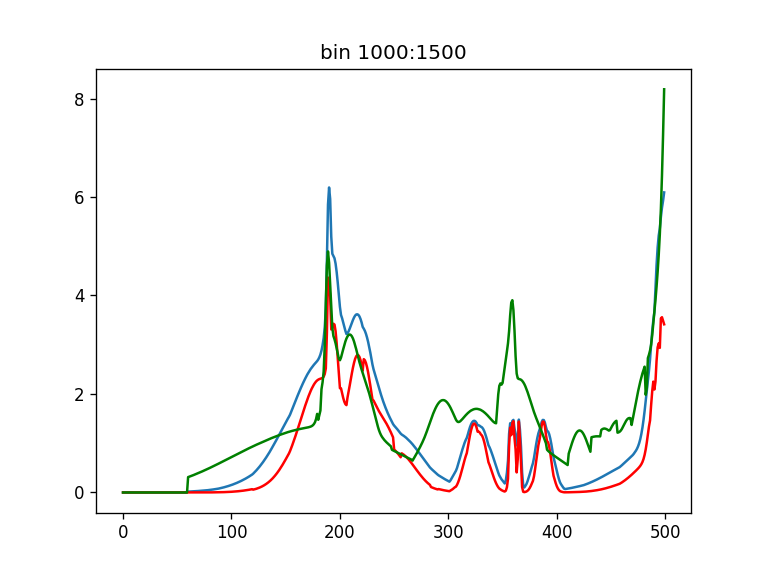

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


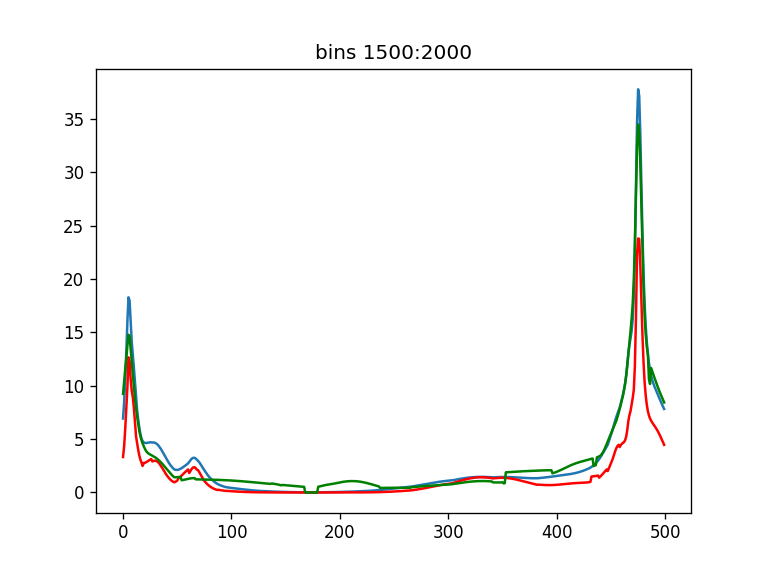

scaled ratio = 0.922 
scaled ratio = 1.223 
scaled ratio = 0.978 
scaled ratio = 0.887 
scaled ratio = 0.670 
scaled ratio = 1.180 
scaled ratio = 0.941 
scaled ratio = 1.194 
scaled ratio = 0.965 
scaled ratio = 1.013 
scaled ratio = 0.756 
scaled ratio = 1.054 
scaled ratio = 1.092 
scaled ratio = 1.077 
scaled ratio = 0.889 
scaled ratio = 1.121 
scaled ratio = 1.048 
scaled ratio = 1.171 
scaled ratio = 1.232 
scaled ratio = 1.112 
scaled ratio = 0.906 
scaled ratio = 1.003 
scaled ratio = 1.049 
scaled ratio = 0.827 
scaled ratio = 0.997 
scaled ratio = 0.995 
scaled ratio = 0.923 
scaled ratio = 1.081 
scaled ratio = 1.062 
scaled ratio = 1.028 
scaled ratio = 1.074 
scaled ratio = 0.926 
scaled ratio = 1.156 
scaled ratio = 0.988 
scaled ratio = 0.877 
scaled ratio = 1.077 
scaled ratio = 1.051 
scaled ratio = 1.152 
scaled ratio = 0.930 
scaled ratio = 1.046 
scaled ratio = 1.081 
scaled ratio = 0.886 
scaled ratio = 1.217 
scaled ratio = 1.003 
scaled ratio = 0.986 
scaled rat

In [32]:
print("X_A,shape = ", X_A.shape)
print("len(X_A) = ",len(X_A))
for i in range(len(X_A)):
  kde_A = X_A[i,0,:]
  kde_B = X_B[i,0,:]
  old_kde = kernel[i,0,:]
##  print("np.max(kde_A) = ",np.max(kde_A), "np.max(kde_B) = ",np.max(kde_B), "np.max(old_kde) = ",np.max(old_kde))
  ratio =  75.*np.max(kde_A)/np.max(old_kde)
  print("scaled ratio = %5.3f " %ratio)  

  if (i<10):
    plt.figure()
    kde_A = 75.*X_A[i,0,:]
    kde_B = 75.*X_B[i,0,:]
    old_kde = kernel[i,0,:]
    plt.plot(kde_A)
    plt.plot(kde_B,color="r")
    plt.plot(old_kde,color="g")
    plt.title("all bins")
    plt.show()

    plt.figure()
    kde_A = 75.*X_A[i,0,1000:1500]
    kde_B = 75.*X_B[i,0,1000:1500]
    old_kde = kernel[i,0,1000:1500]
    plt.plot(kde_A)
    plt.plot(kde_B,color="r")
    plt.plot(old_kde,color="g")
    plt.title("bin 1000:1500")
    plt.show()
    
    plt.figure()
    kde_A = 75.*X_A[i,0,1500:2000]
    kde_B = 75.*X_B[i,0,1500:2000]
    old_kde = kernel[i,0,1500:2000]
    plt.plot(kde_A)
    plt.plot(kde_B,color="r")
    plt.plot(old_kde,color="g")
    plt.title("bins 1500:2000")
    plt.show()
